In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../../Datasets/titanic/train.csv')
df_test = pd.read_csv('../../Datasets/titanic/test.csv')

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# Pclass => Imp
df_train.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [29]:
df_train.groupby('SibSp').mean()['Survived']

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [31]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

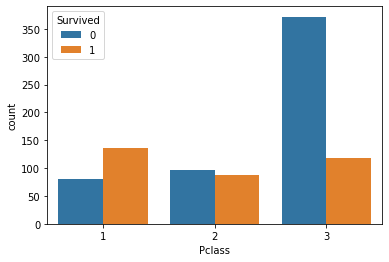

In [32]:
sb.countplot(df_train['Pclass'], hue=df_train['Survived'])

In [33]:
# Sex => Imp
df_train.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

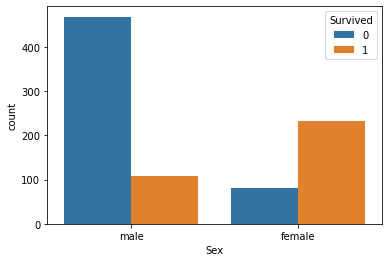

In [34]:
sb.countplot(df_train['Sex'], hue= df_train['Survived'])

In [35]:
dummy = df_train.groupby(['Pclass','Sex']).mean()['Survived']

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

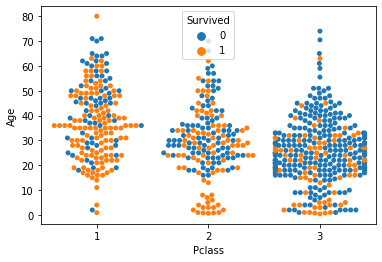

In [36]:
sb.swarmplot(data=df_train,x='Pclass',y='Age',hue='Survived')

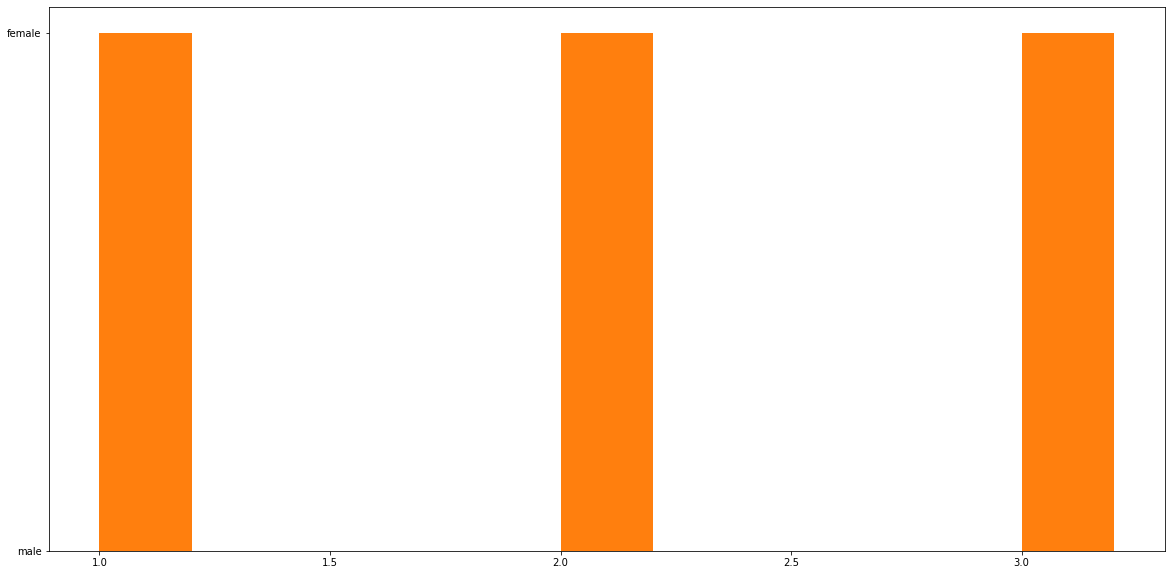

In [37]:
fig = plt.figure(figsize=(20, 10))

ab_bar_list = [plt.bar(df_train['Pclass'], df_train['Sex'], align='edge', width= 0.2),
               plt.bar(df_train['Pclass'], df_train['Survived'], align='edge', width= 0.2)]

# cd_bar_list = [plt.bar([0, 1, 2, 3], df_train['Survived'], align='edge',width= -0.2),
#                plt.bar([0, 1, 2, 3], df_train['Embarked'], align='edge',width= -0.2)]

<AxesSubplot:xlabel='Pclass,Sex'>

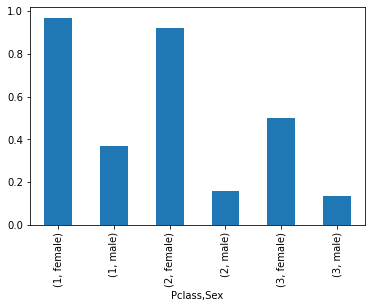

In [38]:
dummy.plot.bar(stacked=True)

In [39]:
dummy

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [ ]:
sb.barplot(x=dummy['Pclass'].index(), y=df_train['Pclass'])

In [41]:
temp = dummy.to_frame().reset_index()
temp

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

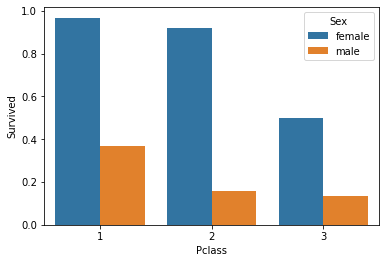

In [42]:
sb.barplot(temp['Pclass'], temp['Survived'], hue=temp['Sex'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

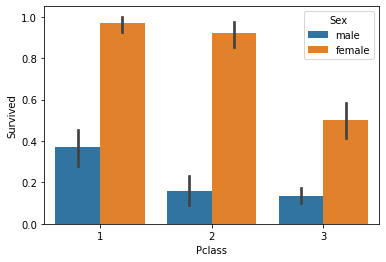

In [43]:
sb.barplot(x='Pclass', y='Survived', data=df_train, hue="Sex")

In [44]:
c0 = df_train[df_train['Survived']==0]
c1 = df_train[df_train['Survived']==1]


<AxesSubplot:xlabel='Fare', ylabel='Count'>

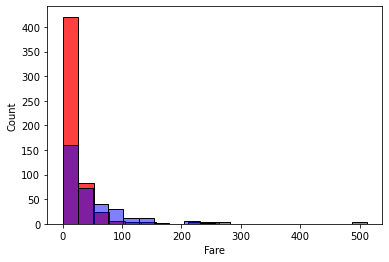

In [45]:
sb.histplot(c0['Fare'], bins=10, color='red')
sb.histplot(c1['Fare'], bins=20, color='blue', alpha=0.5)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

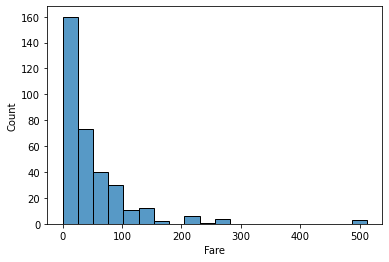

In [46]:
sb.histplot(c1['Fare'], bins=20)

In [47]:
selected_col = ['Pclass','Sex','Age','SibSp','Parch',
                'Fare','Embarked']

In [48]:
# 1. Missing Data
df_train[selected_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [49]:
df_train[selected_col].isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [50]:
df_train['Age'].mean()

29.69911764705882

In [51]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [52]:
#df_train['Embarked'].mode().iloc[0]
df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0], inplace=True)

In [53]:
df_train.groupby(['Embarked']).mean()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [54]:
df_train.groupby(['Fare']).mean()['Survived']

Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64

In [55]:
selected_col = ['Pclass','Sex','Age','SibSp','Parch',
                'Fare','Embarked']

In [56]:
df_train['Age'].mean()

29.699117647058763

In [57]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [9]:
df_train['Embarked'].mode().iloc[0]
df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0], inplace=True)

In [59]:
df_train[selected_col].isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [60]:
df_train[selected_col].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [61]:
# Feature Encoding
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1})
df_train['Embarked'] = df_train['Embarked'].map({'S':0, 'C':1,'Q':2})

In [62]:
df_train[selected_col].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [63]:
# Model Building
X = df_train[selected_col]
y = df_train['Survived']
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

# Working on Test Data

In [64]:
#.1 Missing Data
df_test[selected_col].isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [65]:
df_test['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [66]:
df_train['Fare'].mean(), df_train['Fare'].mode()

(32.2042079685746,
 0    8.05
 dtype: float64)

<AxesSubplot:>

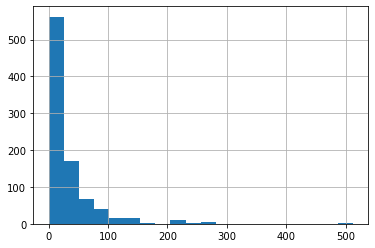

In [67]:
df_train['Fare'].hist(bins=20)

In [68]:
df_test['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_train['Fare'].median(), inplace=True)

In [69]:
df_test[selected_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [70]:
# Feature Encoding
df_test['Sex'] = df_test['Sex'].map({'male':0,'female':1})
df_test['Embarked'] = df_test['Embarked'].map({'S':0,'C':1,'Q':2})

In [71]:
yp=model.predict(df_test[selected_col])

In [72]:
df_test['Survived'] = yp

In [73]:
df_test[['PassengerId','Survived']].to_csv('submit1.csv',index=False)

# Feature Engg.Content

In [74]:
# 1.Handle missing Data ==> mean/median/mode
# 2.Feature Enoding Cat==> numric form
# 3.Feature Scaling ==> MinMaxScalar and Standard Scaler
                # Log Reg, KNN, SVM,Adaboost, xgboost,Kmeans
# Derived Metric(Feature creation)==> create new cols from existing cols
# Outlier Detection ==>
# Binning ==> Age
# Feature Reduction 
# Feature Selection

# Derived Metrics

In [75]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [76]:
selected_col

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [77]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [79]:
df_train['Title'] = df_train['Name'].apply(lambda X:X.split('.')[0].split(' ')[1])

In [83]:
titles = df_train['Title'].value_counts().index[:6]

In [85]:
df_train['Title'] = df_train['Title'].apply(lambda X:X if X in titles else 'other')

In [87]:
df_train['Title'].value_counts()

Mr        502
Miss      179
Mrs       121
Master     40
other      36
Dr          7
Rev         6
Name: Title, dtype: int64

In [88]:
df_train.groupby('Title').mean()['Survived']

Title
Dr        0.428571
Master    0.575000
Miss      0.703911
Mr        0.157371
Mrs       0.801653
Rev       0.000000
other     0.388889
Name: Survived, dtype: float64

In [3]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [93]:
df_train['isCabin'] = df_train['Cabin'].isna().apply(lambda X:0 if X else 1)

In [94]:
df_train.groupby('isCabin').mean()['Survived']

isCabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [4]:
df_train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [5]:
pd.get_dummies(df_train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [6]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
ohe = OneHotEncoder()
ohe.fit(df_train[['Sex','Embarked']])

OneHotEncoder()

In [13]:
ohe.get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [18]:
A = ohe.transform(df_train[['Sex','Embarked']]).toarray()
temp = pd.DataFrame(data=A, columns=ohe.get_feature_names())

In [19]:
temp

,x0_female,x0_male,x1_C,x1_Q,x1_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0
